# QUALITATIVE ANALYSIS
## TRIPADVISOR: HOTEL
* Esteban Ariza
* Johan Giraldo
* Mateo Valdes

## PREREQUISITES

### Install

In [1]:
# %pip install textblob vanderSentiment nrclex pysentiment2
# %pip install pandas
# %pip install nltk
# %pip install nrclex
# %pip install vaderSentiment

### Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from collections import Counter
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.util import ngrams
import json

import nltk
import pysentiment2 as ps

from nrclex import NRCLex
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import statistics

### Download

In [2]:
# Required for NRCLex
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ariza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ariza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Import CSVs

sustainable hotels and other hotels

In [6]:
dir = os.path.abspath('')
SUSTAINABLE_HOTELS_FILE_PATH = '../data/exploratory_analysis/tripadvisor_hotels_sustainable_clean.csv'
OTHER_HOTELS_FILE_PATH = '../data/exploratory_analysis/tripadvisor_hotels_nonsustainable_clean.csv'

sustainable_csv_path = os.path.join(dir, SUSTAINABLE_HOTELS_FILE_PATH)
print(sustainable_csv_path)

others_csv_path = os.path.join(dir, OTHER_HOTELS_FILE_PATH)
print(others_csv_path)

sust_df = pd.read_csv(sustainable_csv_path)
others_df = pd.read_csv(others_csv_path)

c:\Users\ariza\Documents\GitHub\Tripadvisor-Hotel\scripts\../data/exploratory_analysis/tripadvisor_hotels_sustainable_clean.csv
c:\Users\ariza\Documents\GitHub\Tripadvisor-Hotel\scripts\../data/exploratory_analysis/tripadvisor_hotels_nonsustainable_clean.csv


,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_URL,REVIEW_RATING,REVIEW_DATE,REVIEW_HELPFUL_VOTES,REVIEW_TEXT,HOTEL_SUSTAINABLE
0,Fairmont Hotel Vier Jahreszeiten,45,412.0,"Neuer Jungfernstieg 9 - 14, 20354 Hamburg Germany",https://www.tripadvisor.com/Hotel_Review-g1873...,5,2022-07-01,0,Location in the heart of the city right next t...,YES
1,Fairmont Hotel Vier Jahreszeiten,45,412.0,"Neuer Jungfernstieg 9 - 14, 20354 Hamburg Germany",https://www.tripadvisor.com/Hotel_Review-g1873...,5,2022-08-01,1,I have never felt more welcome at a hotel/rest...,YES
2,Fairmont Hotel Vier Jahreszeiten,45,412.0,"Neuer Jungfernstieg 9 - 14, 20354 Hamburg Germany",https://www.tripadvisor.com/Hotel_Review-g1873...,5,2022-07-01,1,"we stayed at this Hotel at the end of July,202...",YES
3,Fairmont Hotel Vier Jahreszeiten,45,412.0,"Neuer Jungfernstieg 9 - 14, 20354 Hamburg Germany",https://www.tripadvisor.com/Hotel_Review-g1873...,5,2022-07-01,1,Best hotel in Hamburg. From front desk to room...,YES
4,Fairmont Hotel Vier Jahreszeiten,45,412.0,"Neuer Jungfernstieg 9 - 14, 20354 Hamburg Germany",https://www.tripadvisor.com/Hotel_Review-g1873...,5,2022-07-01,1,"Great attention from the team, the location is...",YES
...,...,...,...,...,...,...,...,...,...,...
85097,Raw Culture Art & Lofts Bairro Alto,45,349.0,"Rua das Gaveas 103 Bairro Alto, Lisbon 1200-28...",https://www.tripadvisor.com/Hotel_Review-g1891...,5,2019-10-01,2,"This hotel has it all!! Amenities, fantastic s...",NO
85098,Raw Culture Art & Lofts Bairro Alto,45,349.0,"Rua das Gaveas 103 Bairro Alto, Lisbon 1200-28...",https://www.tripadvisor.com/Hotel_Review-g1891...,5,2019-05-01,1,"very stylish trendy hotel,in the center of bai...",NO
85099,Raw Culture Art & Lofts Bairro Alto,45,349.0,"Rua das Gaveas 103 Bairro Alto, Lisbon 1200-28...",https://www.tripadvisor.com/Hotel_Review-g1891...,4,2019-06-01,2,We checked-in to the Raw Culture Barrio Alto l...,NO
85100,Raw Culture Art & Lofts Bairro Alto,45,349.0,"Rua das Gaveas 103 Bairro Alto, Lisbon 1200-28...",https://www.tripadvisor.com/Hotel_Review-g1891...,5,2019-05-01,2,"We were only there two nights, but if I ever h...",NO


## N-Grams

In [25]:
sust_df['REVIEW_DATE'] = sust_df['REVIEW_DATE'].str.replace('Date of stay:', '')
others_df['REVIEW_DATE'] = others_df['REVIEW_DATE'].str.replace('Date of stay:', '')

Add the "TRIMESTER" column

In [26]:
sust_df.REVIEW_DATE = pd.to_datetime(sust_df.REVIEW_DATE)
sust_df['TRIMESTER'] = pd.PeriodIndex(sust_df.REVIEW_DATE, freq="Q").strftime('%Y-Q%q')
sust_df['TRIMESTER'].head()

others_df.REVIEW_DATE = pd.to_datetime(others_df.REVIEW_DATE)
others_df['TRIMESTER'] = pd.PeriodIndex(others_df.REVIEW_DATE, freq="Q").strftime('%Y-Q%q')
others_df['TRIMESTER'].head()


0    2022-Q3
1    2022-Q3
2    2020-Q3
3    2020-Q1
4    2019-Q4
Name: TRIMESTER, dtype: object

In [27]:
def get_ngram_counter(dataframe, n):
    dict = {}
    for tuple in dataframe.itertuples():
        # text = tuple['REVIEW_TEXT']
        text = tuple.REVIEW_TEXT
        # trimester = tuple['trimester']
        trimester = tuple.TRIMESTER
        tokens = nltk.word_tokenize(text)
        
        tokens = [w.lower() for w in tokens if w.isalpha()]
        tokens = [w for w in tokens if not w in stopwords.words('english')]
        ngram = ngrams(tokens, n)

        for item in ngram:
            word = " ".join(item)

            if trimester not in dict:
                dict[trimester] = Counter()    
            
            dict[trimester][word] += 1
    return dict

In [20]:
sust_unigram_counter = get_ngram_counter(sust_df, 1)
sust_bigram_counter = get_ngram_counter(sust_df, 2)
sust_trigram_counter = get_ngram_counter(sust_df, 3)

KeyboardInterrupt: 

In [26]:
others_unigram_counter = get_ngram_counter(others_df, 1)
others_bigram_counter = get_ngram_counter(others_df, 2)
others_trigram_counter = get_ngram_counter(others_df, 3)

2022-Q3
2022-Q3
2020-Q3
2020-Q1
2019-Q4
2019-Q3
2019-Q3
2019-Q2
2019-Q2
2019-Q2
2019-Q2
2019-Q1
2018-Q4
2018-Q3
2018-Q3
2018-Q2
2018-Q2
2018-Q2
2018-Q2
2018-Q2
2017-Q4
2017-Q3
2017-Q3
2017-Q3
2017-Q3
2017-Q3
2017-Q2
2017-Q2
2016-Q3
2017-Q2
2017-Q2
2017-Q2
2017-Q2
2017-Q1
2016-Q3
2016-Q4
2016-Q4
2016-Q3
2016-Q3
2016-Q3
2016-Q3
2016-Q3
2016-Q3
2016-Q3
2016-Q2
2016-Q2
2016-Q2
2016-Q2
2016-Q1
2015-Q4
2015-Q4
2015-Q4
2015-Q4
2015-Q4
2015-Q2
2015-Q2
2015-Q1
2015-Q2
2014-Q3
2014-Q3
2014-Q3
2014-Q1
2014-Q3
2014-Q3
2014-Q2
2014-Q1
2014-Q2
2013-Q4
2013-Q4
2013-Q4
2013-Q3
2013-Q2
2013-Q2
2013-Q2
2013-Q2
2012-Q4
2012-Q3
2012-Q3
2012-Q2
2012-Q2
2012-Q2
2012-Q3
2012-Q2
2012-Q1
2012-Q2
2012-Q1
2012-Q1
2011-Q3
2011-Q3
2011-Q1
2010-Q4
2009-Q4
2010-Q3
2010-Q2
2009-Q4
2009-Q3
2008-Q3
2006-Q3
2022-Q2
2022-Q2
2021-Q4
2021-Q3
2021-Q3
2021-Q3
2020-Q3
2020-Q3
2020-Q1
2020-Q1
2019-Q4
2019-Q4
2019-Q4
2019-Q3
2019-Q3
2019-Q3
2019-Q3
2019-Q3
2019-Q2
2019-Q2
2019-Q2
2019-Q2
2019-Q2
2019-Q2
2019-Q2
2019-Q2
2019-Q1


In [28]:
print(others_unigram_counter.keys())

dict_keys(['2022-Q3', '2020-Q3', '2020-Q1', '2019-Q4', '2019-Q3', '2019-Q2', '2019-Q1', '2018-Q4', '2018-Q3', '2018-Q2', '2017-Q4', '2017-Q3', '2017-Q2', '2016-Q3', '2017-Q1', '2016-Q4', '2016-Q2', '2016-Q1', '2015-Q4', '2015-Q2', '2015-Q1', '2014-Q3', '2014-Q1', '2014-Q2', '2013-Q4', '2013-Q3', '2013-Q2', '2012-Q4', '2012-Q3', '2012-Q2', '2012-Q1', '2011-Q3', '2011-Q1', '2010-Q4', '2009-Q4', '2010-Q3', '2010-Q2', '2009-Q3', '2008-Q3', '2006-Q3', '2022-Q2', '2021-Q4', '2021-Q3', '2018-Q1', '2015-Q3', '2014-Q4', '2013-Q1', '2011-Q4', '2011-Q2', '2022-Q4', '2022-Q1', '2021-Q2', '2020-Q4', '2005-Q4', '2020-Q2', '2010-Q1', '2009-Q1', '2009-Q2', '2006-Q1', '2021-Q1', '2008-Q1', '2007-Q3', '2005-Q3', '2004-Q3', '2008-Q4', '2006-Q2', '2007-Q4', '2007-Q2', '2007-Q1', '2003-Q2', '2008-Q2', '2006-Q4'])


In [31]:
with open("sust_unigram_counter.json", "w") as out:
    json.dump(sust_unigram_counter, out)

with open("sust_bigram_counter.json", "w") as out:
    json.dump(sust_bigram_counter, out)

with open("sust_trigram_counter.json", "w") as out:
    json.dump(sust_trigram_counter, out)


In [32]:
with open("others_unigram_counter.json", "w") as out:
    json.dump(others_unigram_counter, out)

with open("others_bigram_counter.json", "w") as out:
    json.dump(others_bigram_counter, out)

with open("others_trigram_counter.json", "w") as out:
    json.dump(others_trigram_counter, out)

In [93]:
for key, value in sust_unigram_counter.items():
    print(key)
    print(value.most_common(20))

for key, value in sust_bigram_counter.items():
    print(key)
    print(value.most_common(20))

for key, value in sust_trigram_counter.items():
    print(key)
    print(value.most_common(20))


2022-Q3
[('hotel', 512), ('staff', 231), ('room', 205), ('stay', 169), ('great', 152), ('service', 132), ('breakfast', 126), ('one', 111), ('location', 110), ('us', 103), ('amazing', 101), ('would', 93), ('beautiful', 92), ('well', 88), ('also', 87), ('rooms', 86), ('tour', 82), ('friendly', 81), ('restaurant', 81), ('nice', 80)]
2022-Q2
[('hotel', 403), ('staff', 207), ('room', 196), ('stay', 151), ('great', 137), ('service', 115), ('us', 111), ('breakfast', 107), ('location', 90), ('amazing', 88), ('would', 85), ('good', 81), ('restaurant', 75), ('excellent', 71), ('one', 70), ('spa', 70), ('beautiful', 68), ('recommend', 68), ('friendly', 66), ('tour', 66)]
2022-Q1
[('hotel', 166), ('staff', 94), ('room', 84), ('great', 65), ('stay', 61), ('service', 55), ('breakfast', 50), ('rooms', 41), ('spa', 39), ('would', 38), ('location', 37), ('one', 37), ('excellent', 35), ('friendly', 35), ('amazing', 34), ('good', 32), ('food', 32), ('clean', 30), ('beautiful', 30), ('every', 29)]
2021-Q4

In [94]:
for key, value in others_unigram_counter.items():
    print(key)
    print(value.most_common(20))

for key, value in others_bigram_counter.items():
    print(key)
    print(value.most_common(20))

for key, value in others_trigram_counter.items():
    print(key)
    print(value.most_common(20))

2022-Q3
[('hotel', 2192), ('staff', 1124), ('room', 998), ('service', 694), ('stay', 661), ('great', 661), ('breakfast', 645), ('location', 513), ('rooms', 495), ('us', 463), ('beautiful', 450), ('one', 449), ('amazing', 434), ('good', 401), ('would', 393), ('nice', 373), ('food', 370), ('best', 365), ('friendly', 359), ('restaurant', 356)]
2020-Q3
[('hotel', 635), ('staff', 264), ('room', 252), ('service', 198), ('stay', 188), ('great', 161), ('breakfast', 155), ('rooms', 140), ('nice', 135), ('food', 135), ('one', 132), ('pool', 125), ('good', 121), ('beautiful', 118), ('friendly', 110), ('best', 108), ('us', 106), ('restaurant', 104), ('amazing', 100), ('really', 99)]
2020-Q1
[('hotel', 793), ('staff', 380), ('room', 321), ('great', 248), ('stay', 208), ('service', 199), ('breakfast', 181), ('location', 173), ('us', 162), ('good', 150), ('rooms', 150), ('one', 138), ('nice', 132), ('restaurant', 129), ('beautiful', 128), ('amazing', 127), ('well', 123), ('excellent', 119), ('stayed'

## Sentiment

### Normal

initialize the dictionaries

In [28]:
vader_analyzer = SentimentIntensityAnalyzer()
hiv4 = ps.HIV4()
lm = ps.LM()

get polarity and subjetivity from the review text

In [30]:
def getPolarity(row):
    analysis = TextBlob(row)
    # print([analysis.sentiment.polarity, analysis.sentiment.subjectivity])
    return analysis.sentiment.polarity

def getSubjectivity(row):
    analysis = TextBlob(row)
    # print([analysis.sentiment.polarity, analysis.sentiment.subjectivity])
    return analysis.sentiment.polarity


In [31]:
sust_df['TB_polarity'] = sust_df['REVIEW_TEXT'].apply(lambda row : getPolarity(row))
sust_df['TB_subjectivity'] = sust_df['REVIEW_TEXT'].apply(lambda row: getSubjectivity(row))

others_df['TB_polarity'] = others_df['REVIEW_TEXT'].apply(lambda row : getPolarity(row))
others_df['TB_subjectivity'] = others_df['REVIEW_TEXT'].apply(lambda row: getSubjectivity(row))


others_df.head()

,Unnamed: 0,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_URL,REVIEW_RATING,REVIEW_DATE,REVIEW_HELPFUL_VOTES,REVIEW_TEXT,HOTEL_SUSTAINABLE,TRIMESTER,TB_polarity,TB_subjectivity
0,0,Hotel Restaurant VILLINO,50,0.0,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,5,2022-09-01,0,"Stayed here 5 nights. Immaculate rooms, beauti...",NO,2022-Q3,0.440952,0.440952
1,1,Hotel Restaurant VILLINO,50,0.0,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,5,2022-07-01,0,The stay in this hotel was magnificent. It has...,NO,2022-Q3,0.407292,0.407292
2,2,Hotel Restaurant VILLINO,50,0.0,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,5,2020-07-01,2,"Wow, what a find! We stayed in this beautiful ...",NO,2020-Q3,0.360417,0.360417
3,3,Hotel Restaurant VILLINO,50,0.0,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,5,2020-02-01,2,we had only 1 night as a weekend break. Arrivi...,NO,2020-Q1,0.365278,0.365278
4,4,Hotel Restaurant VILLINO,50,0.0,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,5,2019-12-01,1,We stayed in the Hotel Villino for three night...,NO,2019-Q4,0.365972,0.365972


obtain the scores (vader, HIV4, LM, NRC)

In [32]:
sust_df['vader_score'] = sust_df['REVIEW_TEXT'].apply(lambda row : vader_analyzer.polarity_scores(row))
others_df['vader_score'] = others_df['REVIEW_TEXT'].apply(lambda row : vader_analyzer.polarity_scores(row))

In [33]:
sust_df['HIV4_score'] = sust_df['REVIEW_TEXT'].apply(lambda row: hiv4.get_score(hiv4.tokenize(row)))
others_df['HIV4_score'] = others_df['REVIEW_TEXT'].apply(lambda row: hiv4.get_score(hiv4.tokenize(row)))

In [34]:
sust_df['LM_score'] = sust_df['REVIEW_TEXT'].apply(lambda row: lm.get_score(lm.tokenize(row)))
others_df['LM_score'] = others_df['REVIEW_TEXT'].apply(lambda row: lm.get_score(lm.tokenize(row)))

In [35]:
sust_df['NRC_affect'] = sust_df['REVIEW_TEXT'].apply(lambda row: NRCLex(row).affect_frequencies)
others_df['NRC_affect'] = others_df['REVIEW_TEXT'].apply(lambda row: NRCLex(row).affect_frequencies)

In [36]:
sust_df.head()

,Unnamed: 0,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_URL,REVIEW_RATING,REVIEW_DATE,REVIEW_HELPFUL_VOTES,REVIEW_TEXT,HOTEL_SUSTAINABLE,TRIMESTER,TB_polarity,TB_subjectivity,vader_score,HIV4_score,LM_score,NRC_affect
0,68209,Fairmont Hotel Vier Jahreszeiten,45,412.0,"Neuer Jungfernstieg 9 - 14, 20354 Hamburg Germany",https://www.tripadvisor.com/Hotel_Review-g1873...,5,2022-07-01,0,Location in the heart of the city right next t...,YES,2022-Q3,0.295417,0.295417,"{'neg': 0.011, 'neu': 0.807, 'pos': 0.182, 'co...","{'Positive': 18, 'Negative': 5, 'Polarity': 0....","{'Positive': 5, 'Negative': 0, 'Polarity': 0.9...","{'fear': 0.024390243902439025, 'anger': 0.0243..."
1,68210,Fairmont Hotel Vier Jahreszeiten,45,412.0,"Neuer Jungfernstieg 9 - 14, 20354 Hamburg Germany",https://www.tripadvisor.com/Hotel_Review-g1873...,5,2022-08-01,1,I have never felt more welcome at a hotel/rest...,YES,2022-Q3,0.577778,0.577778,"{'neg': 0.026, 'neu': 0.681, 'pos': 0.293, 'co...","{'Positive': 9, 'Negative': 3, 'Polarity': 0.4...","{'Positive': 3, 'Negative': 0, 'Polarity': 0.9...","{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
2,68211,Fairmont Hotel Vier Jahreszeiten,45,412.0,"Neuer Jungfernstieg 9 - 14, 20354 Hamburg Germany",https://www.tripadvisor.com/Hotel_Review-g1873...,5,2022-07-01,1,"we stayed at this Hotel at the end of July,202...",YES,2022-Q3,0.162778,0.162778,"{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound...","{'Positive': 8, 'Negative': 4, 'Polarity': 0.3...","{'Positive': 2, 'Negative': 1, 'Polarity': 0.3...","{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
3,68212,Fairmont Hotel Vier Jahreszeiten,45,412.0,"Neuer Jungfernstieg 9 - 14, 20354 Hamburg Germany",https://www.tripadvisor.com/Hotel_Review-g1873...,5,2022-07-01,1,Best hotel in Hamburg. From front desk to room...,YES,2022-Q3,0.555556,0.555556,"{'neg': 0.0, 'neu': 0.622, 'pos': 0.378, 'comp...","{'Positive': 8, 'Negative': 2, 'Polarity': 0.5...","{'Positive': 2, 'Negative': 0, 'Polarity': 0.9...","{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
4,68213,Fairmont Hotel Vier Jahreszeiten,45,412.0,"Neuer Jungfernstieg 9 - 14, 20354 Hamburg Germany",https://www.tripadvisor.com/Hotel_Review-g1873...,5,2022-07-01,1,"Great attention from the team, the location is...",YES,2022-Q3,0.620810,0.620810,"{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'comp...","{'Positive': 9, 'Negative': 0, 'Polarity': 0.9...","{'Positive': 5, 'Negative': 0, 'Polarity': 0.9...","{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."


In [37]:
sust_df = pd.concat([sust_df, sust_df['vader_score'].apply(pd.Series)], axis=1)
sust_df = pd.concat([sust_df, sust_df['LM_score'].apply(pd.Series).add_prefix('LM_')], axis=1)
sust_df = pd.concat([sust_df, sust_df['HIV4_score'].apply(pd.Series).add_prefix('HIV4_')], axis=1)

sust_df.head()

,Unnamed: 0,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_URL,REVIEW_RATING,REVIEW_DATE,REVIEW_HELPFUL_VOTES,REVIEW_TEXT,...,pos,compound,LM_Positive,LM_Negative,LM_Polarity,LM_Subjectivity,HIV4_Positive,HIV4_Negative,HIV4_Polarity,HIV4_Subjectivity
0,68209,Fairmont Hotel Vier Jahreszeiten,45,412.0,"Neuer Jungfernstieg 9 - 14, 20354 Hamburg Germany",https://www.tripadvisor.com/Hotel_Review-g1873...,5,2022-07-01,0,Location in the heart of the city right next t...,...,0.182,0.9841,5.0,0.0,1.000000,0.071429,18.0,5.0,0.565217,0.328571
1,68210,Fairmont Hotel Vier Jahreszeiten,45,412.0,"Neuer Jungfernstieg 9 - 14, 20354 Hamburg Germany",https://www.tripadvisor.com/Hotel_Review-g1873...,5,2022-08-01,1,I have never felt more welcome at a hotel/rest...,...,0.293,0.9796,3.0,0.0,1.000000,0.093750,9.0,3.0,0.500000,0.375000
2,68211,Fairmont Hotel Vier Jahreszeiten,45,412.0,"Neuer Jungfernstieg 9 - 14, 20354 Hamburg Germany",https://www.tripadvisor.com/Hotel_Review-g1873...,5,2022-07-01,1,"we stayed at this Hotel at the end of July,202...",...,0.100,0.8199,2.0,1.0,0.333333,0.100000,8.0,4.0,0.333333,0.400000
3,68212,Fairmont Hotel Vier Jahreszeiten,45,412.0,"Neuer Jungfernstieg 9 - 14, 20354 Hamburg Germany",https://www.tripadvisor.com/Hotel_Review-g1873...,5,2022-07-01,1,Best hotel in Hamburg. From front desk to room...,...,0.378,0.9823,2.0,0.0,1.000000,0.083333,8.0,2.0,0.600000,0.416667
4,68213,Fairmont Hotel Vier Jahreszeiten,45,412.0,"Neuer Jungfernstieg 9 - 14, 20354 Hamburg Germany",https://www.tripadvisor.com/Hotel_Review-g1873...,5,2022-07-01,1,"Great attention from the team, the location is...",...,0.466,0.9883,5.0,0.0,1.000000,0.250000,9.0,0.0,1.000000,0.450000


In [38]:
others_df = pd.concat([others_df, others_df['vader_score'].apply(pd.Series)], axis=1)
others_df = pd.concat([others_df, others_df['LM_score'].apply(pd.Series).add_prefix('LM_')], axis=1)
others_df = pd.concat([others_df, others_df['HIV4_score'].apply(pd.Series).add_prefix('HIV4_')], axis=1)

others_df.head()

,Unnamed: 0,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_URL,REVIEW_RATING,REVIEW_DATE,REVIEW_HELPFUL_VOTES,REVIEW_TEXT,...,pos,compound,LM_Positive,LM_Negative,LM_Polarity,LM_Subjectivity,HIV4_Positive,HIV4_Negative,HIV4_Polarity,HIV4_Subjectivity
0,0,Hotel Restaurant VILLINO,50,0.0,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,5,2022-09-01,0,"Stayed here 5 nights. Immaculate rooms, beauti...",...,0.232,0.9422,2.0,1.0,0.333333,0.111111,8.0,1.0,0.777778,0.333333
1,1,Hotel Restaurant VILLINO,50,0.0,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,5,2022-07-01,0,The stay in this hotel was magnificent. It has...,...,0.343,0.9728,3.0,0.0,1.000000,0.111111,11.0,0.0,1.000000,0.407407
2,2,Hotel Restaurant VILLINO,50,0.0,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,5,2020-07-01,2,"Wow, what a find! We stayed in this beautiful ...",...,0.257,0.9900,2.0,2.0,0.000000,0.083333,12.0,8.0,0.200000,0.416667
3,3,Hotel Restaurant VILLINO,50,0.0,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,5,2020-02-01,2,we had only 1 night as a weekend break. Arrivi...,...,0.158,0.9391,2.0,1.0,0.333333,0.085714,6.0,5.0,0.090909,0.314286
4,4,Hotel Restaurant VILLINO,50,0.0,"Mittenbuch 6, 88131, Lindau, Bavaria Germany",https://www.tripadvisor.com/Hotel_Review-g1986...,5,2019-12-01,1,We stayed in the Hotel Villino for three night...,...,0.207,0.9719,2.0,0.0,1.000000,0.052632,10.0,4.0,0.428571,0.368421


In [39]:
sust_df.describe()

,Unnamed: 0,HOTEL_RATING,HOTEL_PRICE,REVIEW_RATING,REVIEW_HELPFUL_VOTES,TB_polarity,TB_subjectivity,neg,neu,pos,compound,LM_Positive,LM_Negative,LM_Polarity,LM_Subjectivity,HIV4_Positive,HIV4_Negative,HIV4_Polarity,HIV4_Subjectivity
count,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000,16903.000000
mean,76660.000000,46.698811,395.435662,4.681891,1.396853,0.358216,0.358216,0.020365,0.738238,0.241399,0.879800,2.633379,0.898539,0.504344,0.101689,9.099686,2.736201,0.554252,0.330554
std,4879.620135,2.589581,455.079911,0.745536,1.780658,0.163999,0.163999,0.031111,0.094778,0.102494,0.293013,1.798957,1.186217,0.555955,0.059039,4.555610,2.426322,0.312940,0.092426
min,68209.000000,35.000000,0.000000,1.000000,0.000000,-0.875000,-0.875000,0.000000,0.183000,0.000000,-0.988800,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,72434.500000,45.000000,132.000000,5.000000,1.000000,0.257931,0.257931,0.000000,0.680000,0.169000,0.921800,1.000000,0.000000,0.000000,0.058824,6.000000,1.000000,0.333333,0.266667
50%,76660.000000,45.000000,272.000000,5.000000,1.000000,0.360268,0.360268,0.000000,0.747000,0.234000,0.966100,2.000000,1.000000,0.600000,0.095238,8.000000,2.000000,0.600000,0.325000
75%,80885.500000,50.000000,444.000000,5.000000,2.000000,0.460678,0.460678,0.031000,0.805000,0.306000,0.982900,4.000000,1.000000,1.000000,0.135135,12.000000,4.000000,0.777778,0.387755
max,85111.000000,50.000000,2032.000000,5.000000,73.000000,1.000000,1.000000,0.438000,1.000000,0.817000,0.999700,17.000000,18.000000,1.000000,0.571429,81.000000,63.000000,1.000000,0.900000


In [40]:
others_df.describe()

,Unnamed: 0,HOTEL_RATING,HOTEL_PRICE,REVIEW_RATING,REVIEW_HELPFUL_VOTES,TB_polarity,TB_subjectivity,neg,neu,pos,compound,LM_Positive,LM_Negative,LM_Polarity,LM_Subjectivity,HIV4_Positive,HIV4_Negative,HIV4_Polarity,HIV4_Subjectivity
count,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000,68199.000000
mean,34103.441561,46.105661,345.289564,4.627121,1.413906,0.349501,0.349501,0.021463,0.740142,0.238395,0.863008,2.563322,0.898371,0.490405,0.100282,8.842798,2.763325,0.543534,0.325493
std,19691.776147,3.044323,354.646496,0.815511,1.952410,0.167909,0.167909,0.033016,0.095617,0.104490,0.323837,1.785000,1.193994,0.567913,0.059147,4.489332,2.471340,0.324877,0.091433
min,0.000000,35.000000,0.000000,1.000000,0.000000,-1.000000,-1.000000,0.000000,0.144000,0.000000,-0.995700,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,17049.500000,45.000000,148.000000,5.000000,1.000000,0.249711,0.249711,0.000000,0.680000,0.164000,0.915200,1.000000,0.000000,0.000000,0.058824,6.000000,1.000000,0.333333,0.263158
50%,34099.000000,45.000000,228.000000,5.000000,1.000000,0.352715,0.352715,0.000000,0.748000,0.232000,0.964700,2.000000,1.000000,0.600000,0.093023,8.000000,2.000000,0.583333,0.320000
75%,51158.500000,50.000000,469.000000,5.000000,2.000000,0.454509,0.454509,0.033000,0.809000,0.305000,0.982400,4.000000,1.000000,1.000000,0.133333,11.000000,4.000000,0.777778,0.380952
max,68208.000000,50.000000,3001.000000,5.000000,209.000000,1.000000,1.000000,0.441000,1.000000,0.856000,0.999700,29.000000,27.000000,1.000000,0.714286,130.000000,61.000000,1.000000,1.000000


Save df into a csv

In [42]:
SUST_OUTPUT_PATH = '../data/qualitative_analysis/sentiment/tripadvisor_hotels_sustainable_sentiments.csv'
OTHER_OUTPUT_PATH = '../data/qualitative_analysis/sentiment/tripadvisor_hotels_nonsustainable_sentiments.csv'

sust_df.to_csv(SUST_OUTPUT_PATH, index=False)
others_df.to_csv(OTHER_OUTPUT_PATH, index=False)

### Normalize

Import summaries

In [2]:
SUMMARY_FILE_PATH = '../data/review_summarizer/summarized_reviews_by_year_and_hotel-small.csv'
summary_df = pd.read_csv(SUMMARY_FILE_PATH)

Normalize method

In [3]:
def normalize(from_range, to_range, value):
    on_decimal = to_range[0] + ( (value - from_range[0]) * (to_range[1] - to_range[0]) / (from_range[1] - from_range[0]) )
    return round(on_decimal*2)/2

Vader

In [4]:
vader_analyzer = SentimentIntensityAnalyzer()

def vaderRating(text):
    compound = vader_analyzer.polarity_scores(text)["compound"]
    return normalize((-1, 1), (1, 5), compound)

summary_df['VADER_RATING'] = summary_df['REVIEW_SUMMARY'].apply(vaderRating)

In [5]:
print(summary_df['VADER_RATING'].value_counts())

5.0    1021
4.5     877
4.0     324
3.0     206
3.5     114
2.5      40
2.0      37
1.5      12
1.0       1
Name: VADER_RATING, dtype: int64


HIV4

In [6]:
hiv4 = ps.HIV4()

def hiv4Rating(text):
    polarity = hiv4.get_score(hiv4.tokenize(text))['Polarity']
    return normalize((-1, 1), (1, 5), polarity)

summary_df['HIV4_RATING'] = summary_df['REVIEW_SUMMARY'].apply(hiv4Rating)

In [7]:
print(summary_df['HIV4_RATING'].value_counts())

5.0    1341
4.0     370
3.5     302
3.0     241
4.5     234
2.5      66
1.0      55
2.0      21
1.5       2
Name: HIV4_RATING, dtype: int64


LM

In [8]:
lm = ps.LM()

def lmRating(text):
    polarity = lm.get_score(lm.tokenize(text))['Polarity']
    return normalize((-1, 1), (1, 5), polarity)

summary_df['LM_RATING'] = summary_df['REVIEW_SUMMARY'].apply(lmRating)

In [9]:
print(summary_df['LM_RATING'].value_counts())

5.0    1422
3.0     887
1.0     173
3.5      85
4.0      47
2.5      18
Name: LM_RATING, dtype: int64


Overall

In [10]:
def overallRating(row):
    return round( statistics.mean([row['VADER_RATING'], row['HIV4_RATING'], row['LM_RATING']])*2 )/2

summary_df['OVERALL_RATING'] = summary_df.apply(overallRating, axis=1)

In [11]:
print(summary_df['OVERALL_RATING'].value_counts())

5.0    914
4.5    551
4.0    540
3.5    310
3.0    175
2.5     86
2.0     36
1.5     18
1.0      2
Name: OVERALL_RATING, dtype: int64


Summaries with rating

In [12]:
summary_df

,HOTEL_NAME,REVIEW_DATE,REVIEW_TEXT,REVIEW_SUMMARY,VADER_RATING,HIV4_RATING,LM_RATING,OVERALL_RATING
0,Corpo Santo Lisbon Historical Hotel,2022,we loved the place and loved it again this tim...,the staff at the Corpo Santo Historical Hotel ...,4.5,5.0,3.0,4.0
1,Kimpton De Witt Amsterdam,2019,the hotel is unique in style and comfortable. ...,"the hotel is located in the heart of the city,...",5.0,5.0,5.0,5.0
2,Corinthia Budapest,2019,hotel moments Budapest was a great place to st...,the corinthia hotel in the heart of the city i...,5.0,5.0,5.0,5.0
3,Grandior Hotel Prague,2019,the room was excellent and the buffet breakfas...,the hotel is located in the heart of the old c...,5.0,5.0,5.0,5.0
4,Hilton Budapest,2019,the hotel is built into the rocks in the ruins...,the hotel is located in the heart of the castl...,4.5,4.0,3.0,4.0
...,...,...,...,...,...,...,...,...
2627,The Guesthouse Vienna,2015,The best location to be in old Vienna. You can...,this is one of the most beautiful cities in th...,4.5,5.0,5.0,5.0
2628,Andreus Resort,2021,"If you need the ""perfection"" during a Holiday,...","Andreus Resort is a luxury resort, with easy m...",4.5,4.0,5.0,4.5
2629,Mystery Hotel Budapest,2018,The hotel is fabolous and has a very unique de...,the hotel is fabolous and has a very unique de...,5.0,5.0,5.0,5.0
2630,Olissippo Lapa Palace,2014,"Huge bedrooms, really comfortable, wonderful g...",Lisbon is a wonderful city to visit. no hesits...,5.0,5.0,5.0,5.0


Some examples of reviews by rating

In [13]:
print('\n1 bubble:', summary_df[summary_df['OVERALL_RATING'] == 1].iloc[0]['REVIEW_SUMMARY'])
print('\n2 bubbles:', summary_df[summary_df['OVERALL_RATING'] == 2].iloc[0]['REVIEW_SUMMARY'])
print('\n3 bubbles:', summary_df[summary_df['OVERALL_RATING'] == 3].iloc[0]['REVIEW_SUMMARY'])
print('\n4 bubbles:', summary_df[summary_df['OVERALL_RATING'] == 4].iloc[0]['REVIEW_SUMMARY'])
print('\n5 bubbles:', summary_df[summary_df['OVERALL_RATING'] == 5].iloc[0]['REVIEW_SUMMARY'])


1 bubble: the queens court hotel is located near the ruinpubs and the shopping center of Budapest. the hotel promotes itself as a 5 star five star hotel but fairly said it should be 4 stars.staff were unprofessional, the room was old and stuffy,'spa' area. this is the worst hotel I have ever stayed in.

2 bubbles: the 5 star facility is located in a somehow isolated part of Punta Skala. the spa was exceptional and the staff couldn't do enough for you. it was our second stay at Falkensteiner Iadera.

3 bubbles: the royal blue hotel in dubrovnik is part of a cluster of five hotels. the hotel is located in the old town of dube, u.s.

4 bubbles: the staff at the Corpo Santo Historical Hotel were very helpful and helpful. the hotel is located in the heart of the city, close to the seaside promenade and a few blocks from the main square.

5 bubbles: the hotel is located in the heart of the city, just 5 minutes from the central station. the staff were very helpful and helpful.the hotel was a

Save df into a csv

In [14]:
SUMMARY_OUTPUT_PATH = '../data/qualitative_analysis/sentiment/tripadvisor_hotels_summaries_sentiments-small.csv'
summary_df.to_csv(SUMMARY_OUTPUT_PATH, index=False)

In order to add the real hotel rating to the "summary_df" we need to import first the csv that we use to do the summaries.

In [15]:
ORGINAL_SUST_HOTELS_FILE_PATH = '../data/exploratory_analysis/tripadvisor_hotels_sustainable_clean.csv'
ORIGINAL_OTHER_HOTELS_FILE_PATH = '../data/exploratory_analysis/tripadvisor_hotels_nonsustainable_clean.csv'

original_sust_df = pd.read_csv(ORGINAL_SUST_HOTELS_FILE_PATH)
original_other_df = pd.read_csv(ORIGINAL_OTHER_HOTELS_FILE_PATH)

original_df = pd.concat([original_sust_df, original_other_df], ignore_index=True)

Then, we add the actual hotel rating column

In [16]:
hotel_df = original_df.groupby(["HOTEL_NAME", "HOTEL_RATING","HOTEL_LOCATION"]).size().reset_index(name='HOTEL_REVIEW_COUNT').drop(['HOTEL_REVIEW_COUNT'], axis=1)

join_df = summary_df.join(hotel_df.set_index('HOTEL_NAME'), on='HOTEL_NAME', validate='m:1')
join_df['HOTEL_RATING'] = join_df['HOTEL_RATING'].map(lambda x: x / 10)

In [17]:
join_df

,HOTEL_NAME,REVIEW_DATE,REVIEW_TEXT,REVIEW_SUMMARY,VADER_RATING,HIV4_RATING,LM_RATING,OVERALL_RATING,HOTEL_RATING,HOTEL_LOCATION
0,Corpo Santo Lisbon Historical Hotel,2022,we loved the place and loved it again this tim...,the staff at the Corpo Santo Historical Hotel ...,4.5,5.0,3.0,4.0,5.0,"Largo do Corpo Santo, 25, Lisbon 1200-129 Port..."
1,Kimpton De Witt Amsterdam,2019,the hotel is unique in style and comfortable. ...,"the hotel is located in the heart of the city,...",5.0,5.0,5.0,5.0,4.5,"Nieuwezijds Voorburgwal 5, 1012 RC Amsterdam T..."
2,Corinthia Budapest,2019,hotel moments Budapest was a great place to st...,the corinthia hotel in the heart of the city i...,5.0,5.0,5.0,5.0,4.5,"Erzsébet krt. 43-49., Budapest 1073 Hungary"
3,Grandior Hotel Prague,2019,the room was excellent and the buffet breakfas...,the hotel is located in the heart of the old c...,5.0,5.0,5.0,5.0,4.5,"Na Porici 42, Prague 110 00 Czech Republic"
4,Hilton Budapest,2019,the hotel is built into the rocks in the ruins...,the hotel is located in the heart of the castl...,4.5,4.0,3.0,4.0,4.5,"Hess András tér 1, Budapest 1014 Hungary"
...,...,...,...,...,...,...,...,...,...,...
2627,The Guesthouse Vienna,2015,The best location to be in old Vienna. You can...,this is one of the most beautiful cities in th...,4.5,5.0,5.0,5.0,5.0,"Fuhrichgasse 10, Vienna 1010 Austria"
2628,Andreus Resort,2021,"If you need the ""perfection"" during a Holiday,...","Andreus Resort is a luxury resort, with easy m...",4.5,4.0,5.0,4.5,4.5,"Via Kallerlahne 3A, 39015 San Leonardo in Pass..."
2629,Mystery Hotel Budapest,2018,The hotel is fabolous and has a very unique de...,the hotel is fabolous and has a very unique de...,5.0,5.0,5.0,5.0,5.0,"Podmaniczky utca 45, Budapest 1064 Hungary"
2630,Olissippo Lapa Palace,2014,"Huge bedrooms, really comfortable, wonderful g...",Lisbon is a wonderful city to visit. no hesits...,5.0,5.0,5.0,5.0,5.0,"Rua do Pau de Bandeira 4, Lisbon 1249-021 Port..."


Density plot

<AxesSubplot: xlabel='RATING', ylabel='Density'>

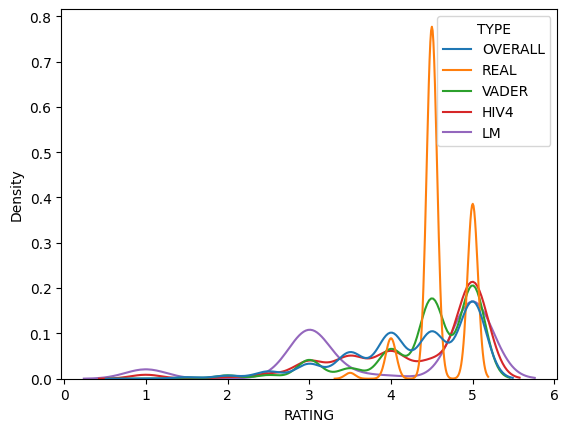

In [21]:
def flatten(l):
    return [item for sublist in l for item in sublist]

ratings_types = [
    np.full(shape=join_df.shape[0], fill_value="OVERALL").tolist(),
    np.full(shape=join_df.shape[0], fill_value="REAL").tolist(),
    np.full(shape=join_df.shape[0], fill_value="VADER").tolist(),
    np.full(shape=join_df.shape[0], fill_value="HIV4").tolist(),
    np.full(shape=join_df.shape[0], fill_value="LM").tolist(),
]

rating_values = [
    join_df["OVERALL_RATING"].tolist(),
    join_df["HOTEL_RATING"].tolist(),
    join_df["VADER_RATING"].tolist(),
    join_df["HIV4_RATING"].tolist(),
    join_df["LM_RATING"].tolist(),
]



ratings_df = pd.DataFrame(data={
    "TYPE":flatten(ratings_types),
    "RATING":flatten(rating_values)
})

ratings_df

sns.kdeplot(
    data=ratings_df,
    x="RATING",
    hue="TYPE",
    # bw_adjust=4
)

Rating stats

In [23]:
join_df.mean()
join_df.std()

C:\Users\ariza\AppData\Local\Temp\ipykernel_8716\2615316488.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  join_df.std()


REVIEW_DATE       4.189843
VADER_RATING      0.727915
HIV4_RATING       0.922588
LM_RATING         1.221663
OVERALL_RATING    0.787597
HOTEL_RATING      0.304622
dtype: float64

Save "join_df" into a csv

In [30]:
WHR_OUTPUT_PATH = '../data/qualitative_analysis/sentiment/tripadvisor_hotels_summaries_whr_sentiments-small.csv'
join_df.to_csv(WHR_OUTPUT_PATH, index=False)